# Data Analysis Interview Questions Assignment

___

# Part 1: Exploratory Data Analysis


The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Importing Necessary Libraries

In [359]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing and Previewing Data

In [163]:
#Reading the json file and saving to 'df'
df = pd.read_json('logins.json')

#Displaying data and counting entries
print('There are ' + str(df.login_time.count()) + ' entries in the dataset.')
df.head()

There are 93142 entries in the dataset.


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [164]:
#Resampling the data by 15 minute intervals
df = df.resample('15Min', on = 'login_time').count()

#Renaming column to reflect changes
df.columns = ['login_count']

#Displaying data and counting entries
print('There are ' + str(df.login_count.count()) + ' entries in the resampled dataset.')
df.head(5)

There are 9788 entries in the resampled dataset.


,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


_The resampling was successful. There are now login counts for each 15 minute interval in the dataset. The dataframe went from 93,172 entries to 9,788 entries._

## Visualizing 15-Minute Login Count Trends

In this section I will visualize 15-minute login count trends to discover any usage patterns that may exist.

### Visualization by Week

Text(0.5, 1.0, '15-Minute Login Counts Per Week in January and February')

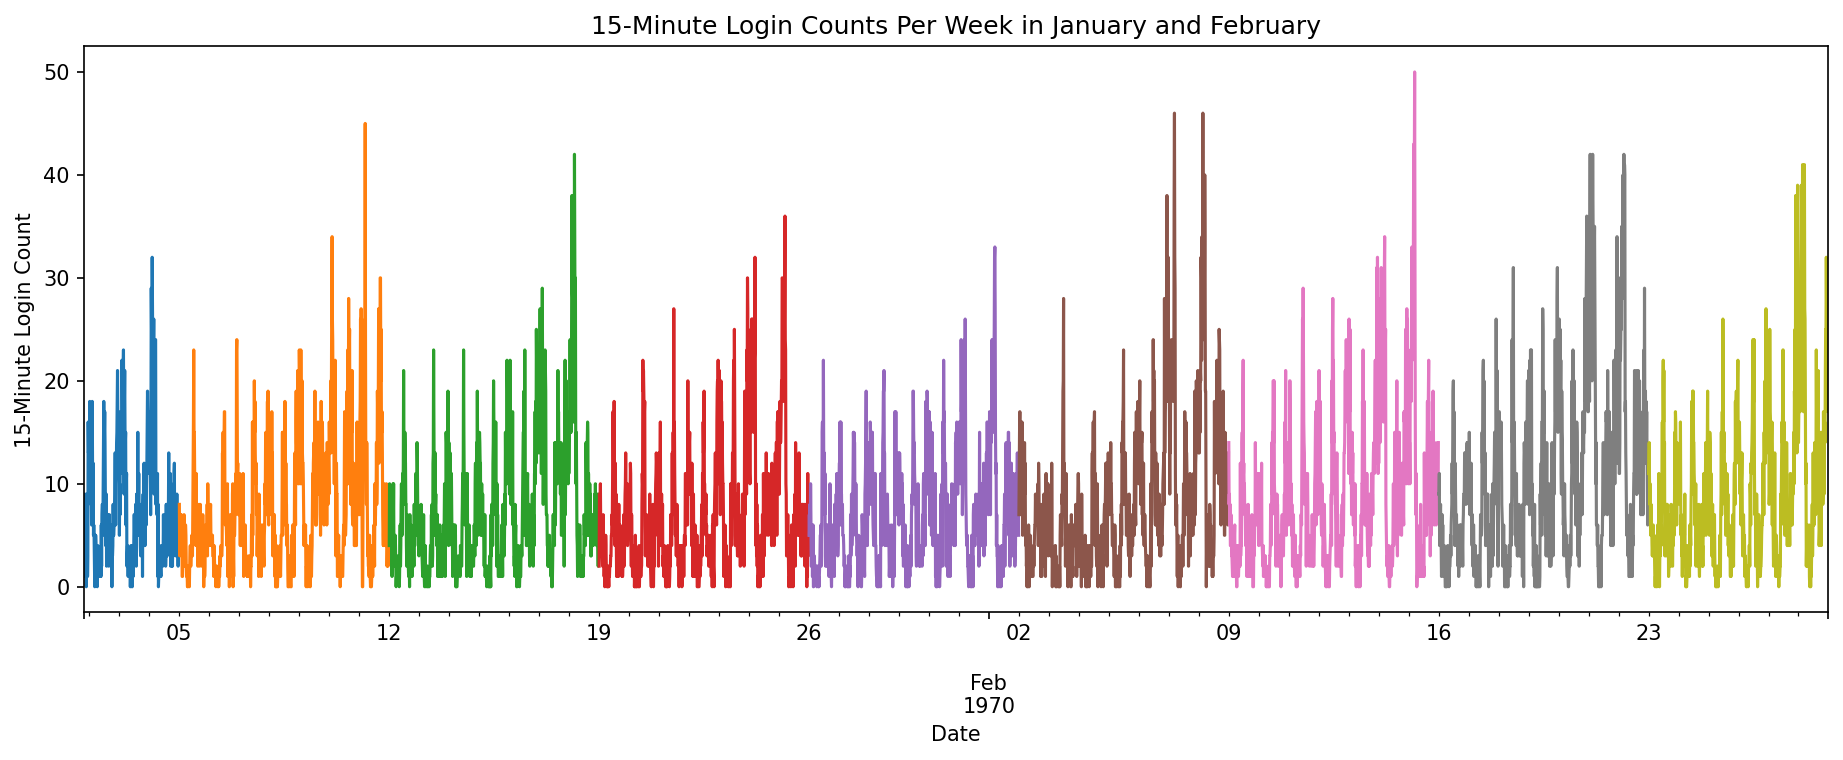

In [196]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)

#Selecting for January and February in the data, then resampling weekly to visualize weekly changes
df['1970-01' : '1970-02'].resample('W').plot()

#Setting axis labels and title
plt.ylabel('15-Minute Login Count')
plt.xlabel('Date')
plt.title('15-Minute Login Counts Per Week in January and February')

_From this visualization we can see that **login activity peaks at the end of each week, reaching a peak of about 30-50 logins per 15-minutes**. To gather more insights I will visualize the daily and hourly changes._

### Visualization by Day

Text(0.5, 1.0, '15-Minute Login Counts Per Day')

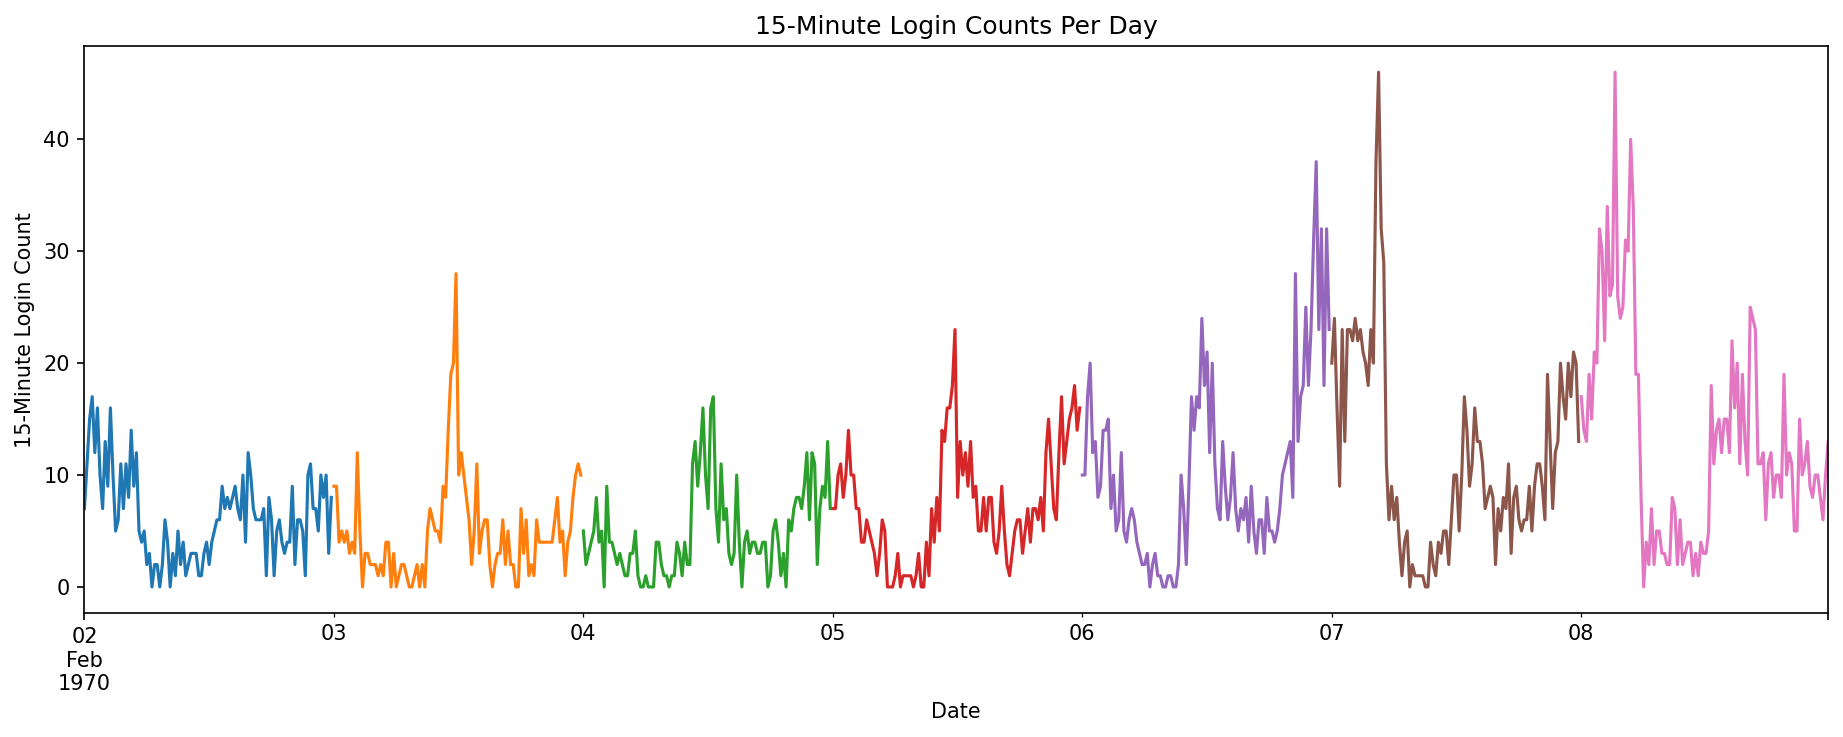

In [197]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)

#Selecting for one week in Feburary then resampling daily to visualize daily changes
df['1970-02-02' :'1970-02-08'].resample('D').plot()


#Setting axis labels and title
plt.ylabel('15-Minute Login Count')
plt.xlabel('Date')
plt.title('15-Minute Login Counts Per Day')

_From this visualization we can see that **during weekdays there is a spike in user activity around mid-day where login counts increase to 20-30 per 15-minutes**. We can also see that **on weekends there is an additional, larger, spike in user activity in the middle of the night, which surpasses 40 logins per 15-minutes**._

### Visualization by Hour

**Weekend**

Text(0.5, 1.0, '15-Minute Login Counts Per Hour - Weekend')

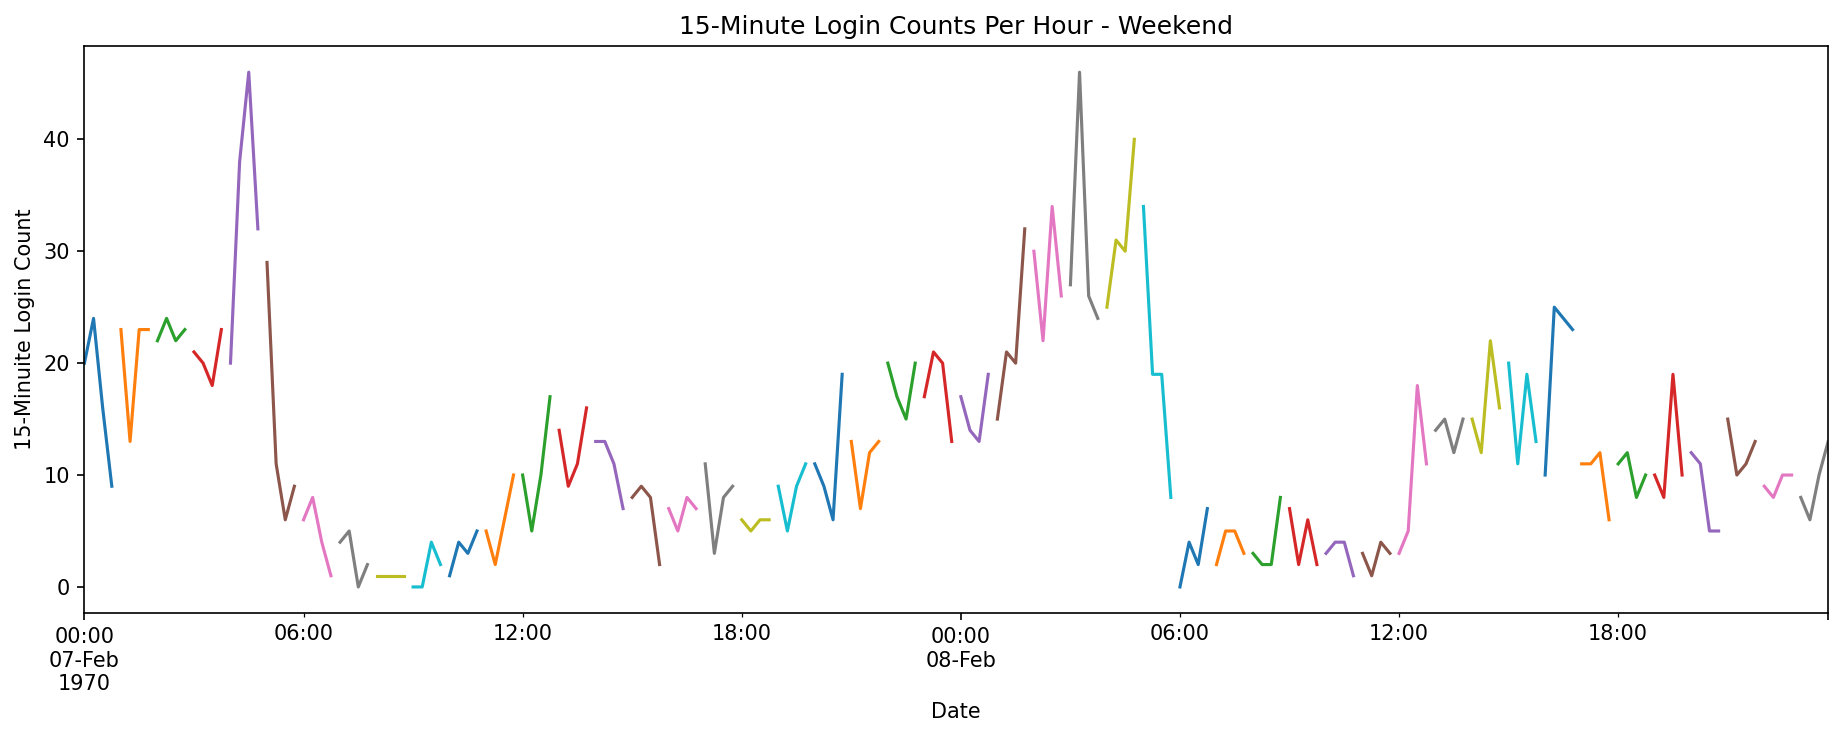

In [198]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)

#Selecting a weekend in Februrary and resampling hourly to visualize hourly changes
df['1970-02-07': '1970-02-08'].resample('H').plot()


#Setting axis labels and title
plt.ylabel('15-Minuite Login Count')
plt.xlabel('Date')
plt.title('15-Minute Login Counts Per Hour - Weekend')

_**On weekends the baseline login count is between 0-20 logins per 15-minutes. There is a large spike in user activity between 00:00 - 06:00, which surpasses 40 logins per 15-minutes, and then drops back to the baseline. There is an additional, smaller, spike in user activity between 12:00 - 18:00 which reaches about 20 logins per 15-minutes, and then drops back to the baseline.**_

**Weekday**

Text(0.5, 1.0, '15-Minute Login Counts Per Hour - Weekday')

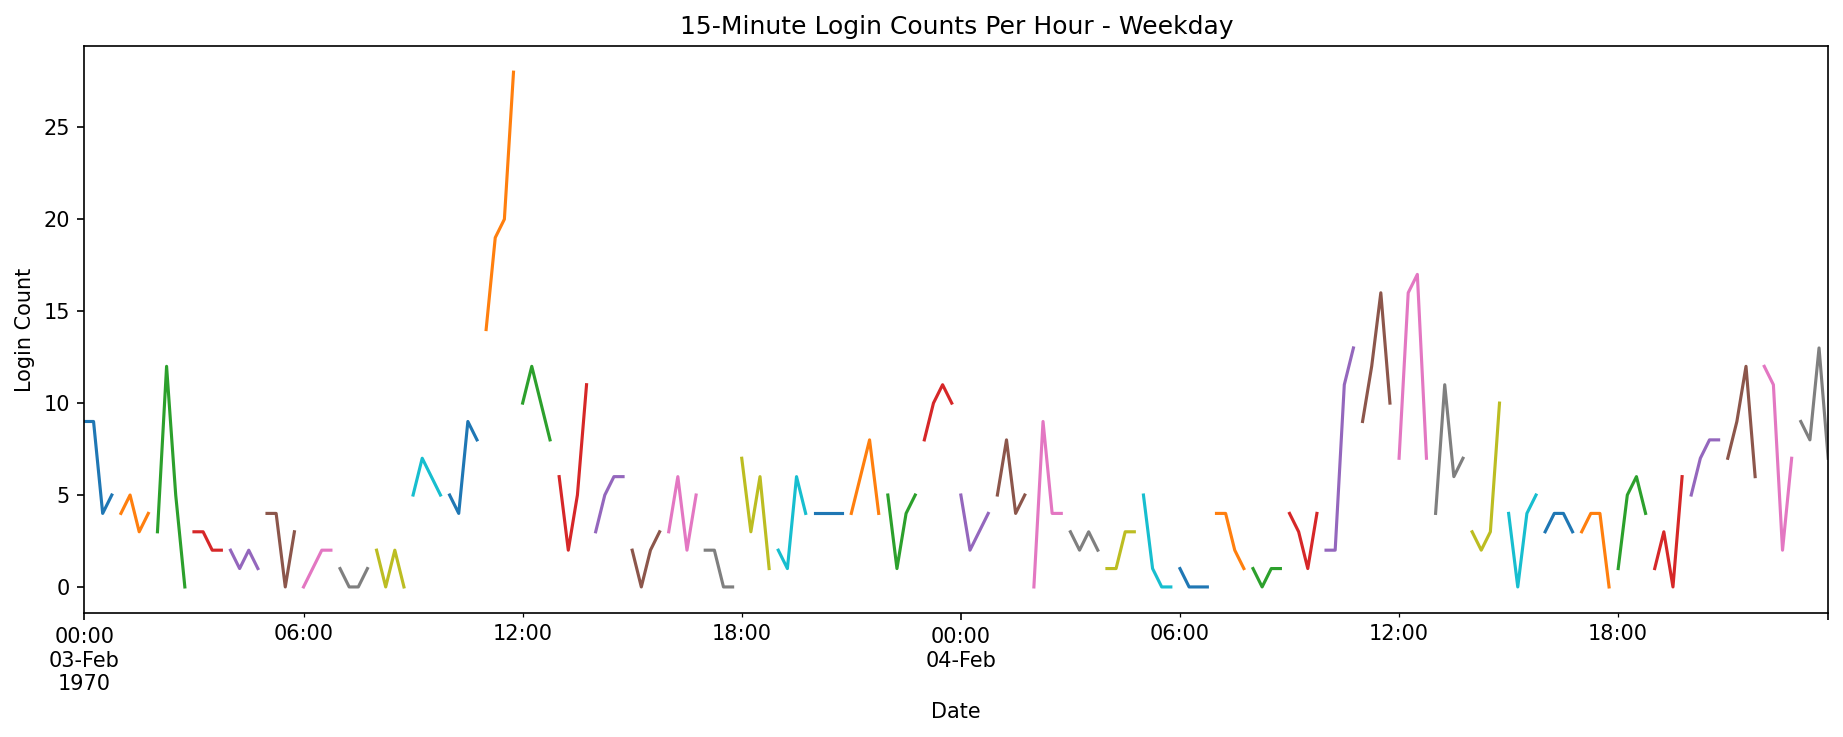

In [168]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)

#Selecting a week in Februrary and resampling hourly to visualize hourly changes
df['1970-02-03' : '1970-02-04'].resample('H').plot()

#Setting axis labels and title
plt.ylabel('Login Count')
plt.xlabel('Date')
plt.title('15-Minute Login Counts Per Hour - Weekday')

_**On weekdays the baseline login count is between 0-10 logins per 15-minutes. There is a spike in user activity at around 12:00, which reaches roughly 15-25 logins per 15-minutes, then quickly drops back to the baseline.**_

## Visualizing Daily Login Count Trends

For this section I will aggreagte the daily login counts and visualize to try to gather further insights about user activity. Though not explicitly asked for in the question prompt, this information could prove to be quite valuable.

In [203]:
#Aggregating daily sum of login counts and saving to new dataframe
df_daily_login = df.resample('D').sum()

#Previewing January daily login counts
df_daily_login.head(30)

,login_count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
1970-01-06,536
1970-01-07,648
1970-01-08,625
1970-01-09,881


### February Daily Login Counts

Text(0.5, 1.0, 'February Daily Login Counts')

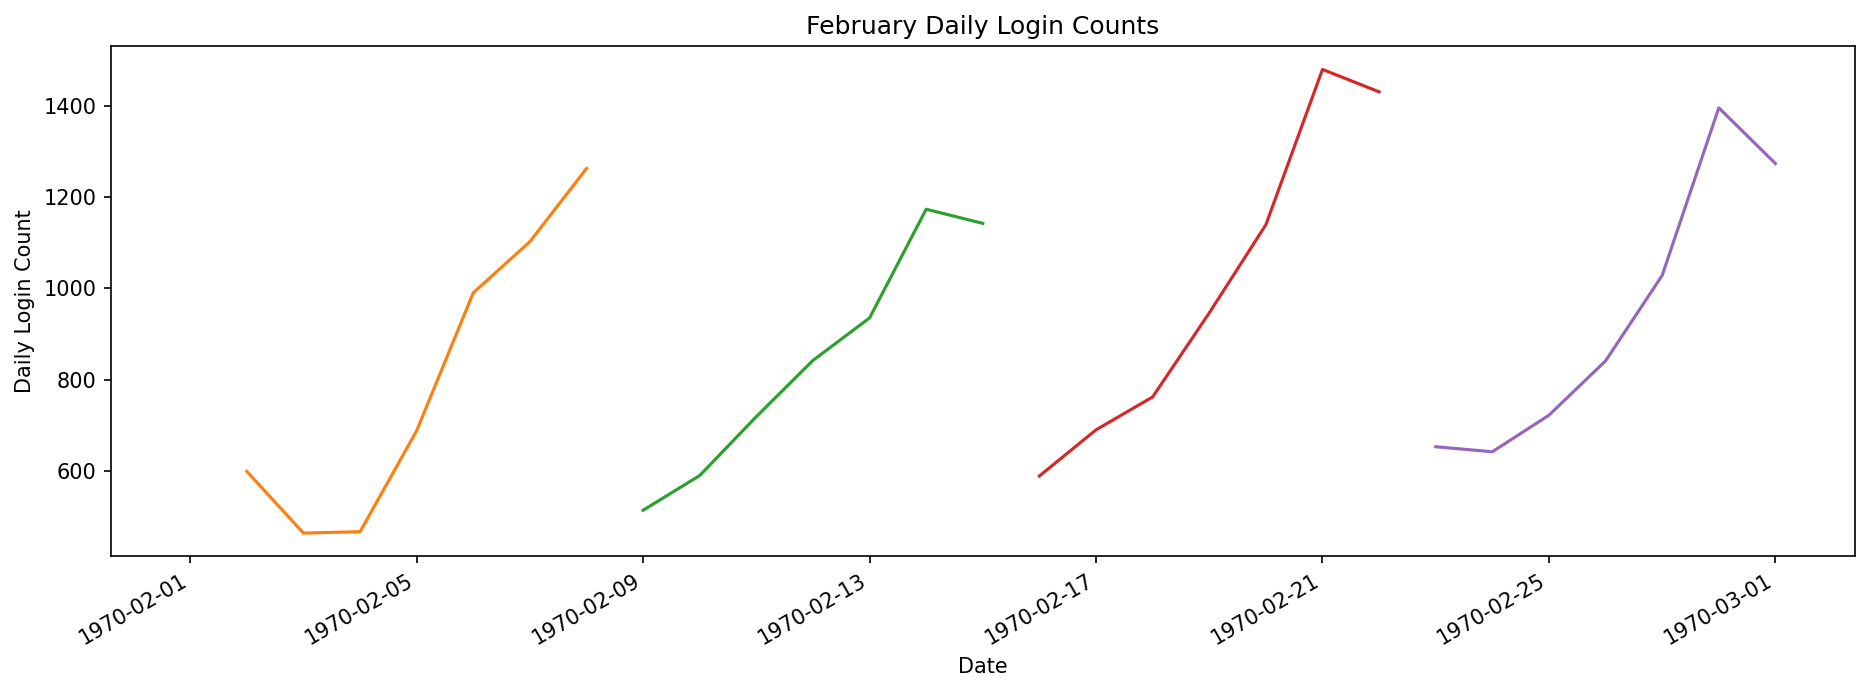

In [204]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)

#Selecting February and resampling weekly to visualize weekly changes
df_daily_login['1970-02-01': '1970-03-01'].resample('W').plot()


#Setting axis labels and title
plt.ylabel('Daily Login Count')
plt.xlabel('Date')
plt.title('February Daily Login Counts')

_From this visualization we can see that the **daily login count increases steadily throughout each week**, it then drops back down to a baseline for the beginning of the following week._

### Total Daily Login Counts

Text(0.5, 1.0, 'Total Daily Login Counts')

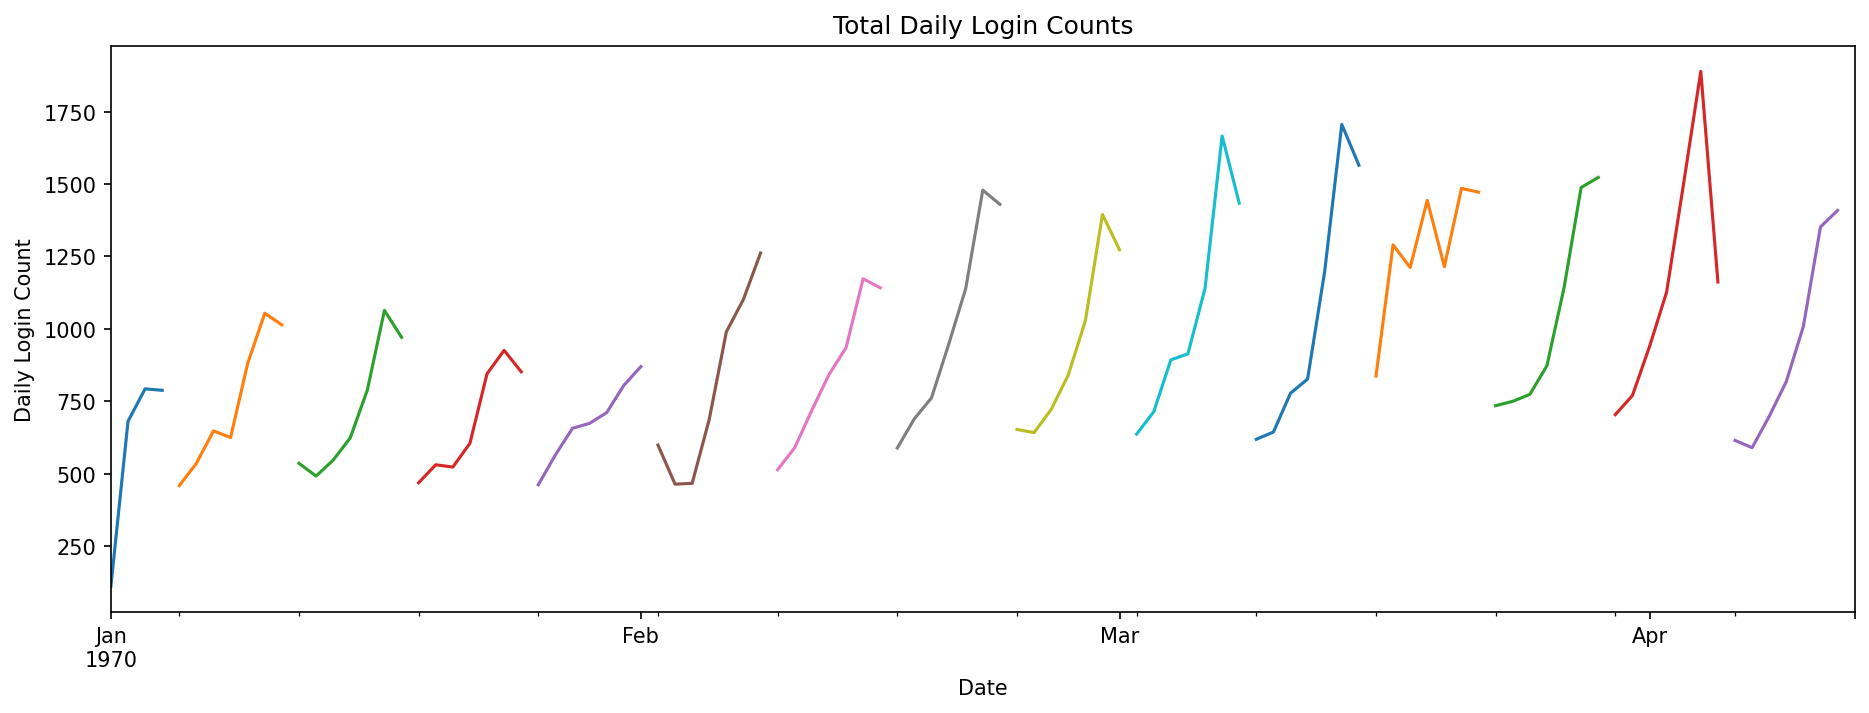

In [200]:
#Change size of figure
plt.figure(figsize = (15,5), dpi = 150)
df_daily_login.resample('W').plot()


#Setting axis labels and title
plt.ylabel('Daily Login Count')
plt.xlabel('Date')
plt.title('Total Daily Login Counts')

_Similar to the preceeding visualization we can see that the daily login count increases throughout each week, however by looking at the entire dataset in the visualization we can see that **the max daily login count for each week appears to be increasing as well, indicating a gradual growth in user activity**._

___

___

# Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
       a) how you will implement the experiment
       b) what statistical test(s) you will conduct to verify the significance of the observation
       c) how you would interpret the results and provide recommendations to the city operations team along
        with any caveats.

### Answers:


**#1:** A good measure of success would be to measure the ratio of total partner driver bridge crossings to total bridge crossings. 

**#2:** I would create a partner driver "Toll-Bridge Crossing Card" that can be used to record the number of times that a partner driver uses the toll-bridge in either direction. This card would also facilitate the reimbursement process for partner drivers. The experiment would be conducted as follows:

1. The experiment will first establish a baseline for four weeks (Monday-Sunday) before any changes are made to the toll-bridge crossings. During this time partner drivers will not be reimbursed for crossing the bridge, but will have their crossings recorded. **Baseline statistics will include a driver partner ratio for each day of the month. These statistics will be aggregated globally, regardless of direction of travel.**
2. After the baseline period drivers will be reimbursed for traveling accross the toll bridge. **The null hypothesis for this experiment is that toll bridge reimbursements will _not_ affect the ratio of driver partner bridge crossings/total bridge crossings.** The alternative hypothesis is that toll bridge reimbursements will increase the ratio of driver partner toll bridge crossings.
3. After four weeks (Monday-Sunday) of collecting data with the toll bridge reimbursements, we will start to analyze the data. The mean driver partner ratios will be calculated for each day of the week for the baseline and the toll reimbursement data. 
4. A Chi-Squared test will then be used to determine if there is a statistically significant increase in the driver partner ratio for each day of the week. Because there are 7 days in the week the Chi Squared test for this experiment will involve 6 degrees of freedom (7-1).
5. We will use a significance value (p-value) of 0.05 to test the hypothesis, if our Chi Squared value is ≥ 12.592 (determined with Chi-Squared table) we can reject the null hypothesis and claim that toll bridge reimbursement increases driver partner usage of the toll bridge.
6. One limitation of this experiment is that it does not capture the direction of travel,or the time of day, of partner driver crossings. Though not necessary for determining the effectiveness of a reimbursement program on a global scale, such data might provide valuable insights for the cities involved and might be worth implementing in the experiment.
7. By splitting the data into days of the week like this, we can look to see which days have higher or lower partner driver ratios. 









___

___

# Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

    1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this 
    analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users 
    were retained?
    2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th 
    month on the system. Discuss why you chose your approach, what alternatives you considered, and any 
    concerns you have. How valid is your model? Include any key indicators of model performance.
    3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term 
    rider retention (again, a few sentences will suffice).

# Loading and Previewing Data

In [421]:
#Reading the json file and saving to 'df'
df = pd.read_json('ultimate_data_challenge.json')

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Dealing with NaN Values

**There are some missing values in 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'.**

I will replace 'avg_rating_of_driver' NaN values with the mean.

I will drop 'phone' NaN values.

I will drop 'avg_rating_by_driver' NaN values.

In [423]:
#Replacing 'avg_rating_of_driver' NaN values with mean
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace = True)

#Dropping 'phone' and 'avg_rating_by_driver' NaN values
df.dropna(inplace = True)

#Checking for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49406 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49406 non-null  object 
 1   trips_in_first_30_days  49406 non-null  int64  
 2   signup_date             49406 non-null  object 
 3   avg_rating_of_driver    49406 non-null  float64
 4   avg_surge               49406 non-null  float64
 5   last_trip_date          49406 non-null  object 
 6   phone                   49406 non-null  object 
 7   surge_pct               49406 non-null  float64
 8   ultimate_black_user     49406 non-null  bool   
 9   weekday_pct             49406 non-null  float64
 10  avg_dist                49406 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


**All NaN values have been handled, there are 49,406 entries remaining.**

**We can see that there are a variety of different datatypes.**

___

# Basic Data Visualizations/Interpretations

### Categorical Features

By plotting the categorical features we can see a few interesting things:

1. Winterfell is the most common city, followed by Astapor and finally King's Landing
2. More users have iPhones than Android
3. There are fewer ultimate black users than there are black users

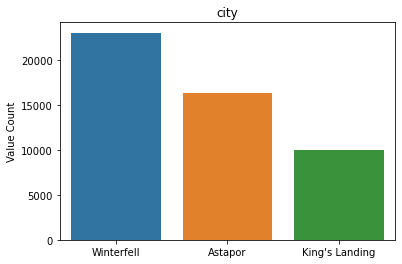

Winterfell        23024
Astapor           16355
King's Landing    10027
Name: city, dtype: int64


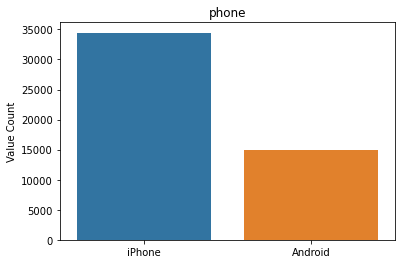

iPhone     34446
Android    14960
Name: phone, dtype: int64


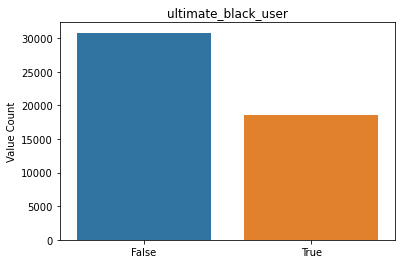

False    30827
True     18579
Name: ultimate_black_user, dtype: int64


In [424]:
cat_features = ['city', 'phone', 'ultimate_black_user']

for feature in cat_features:
    sns.barplot(x = list(df[feature].value_counts().index), y = df[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Value Count')
    plt.show()
    print(df[feature].value_counts())

### Numerical Features

By plotting the numerical features we can see a few interesting things:

1. Most users will take between 0-20 trips in the first 30 days
2. The average rating of drivers is between 4/5 and 5/5
3. The average distance of travel is between 0-20 miles in first 30 days
4. The average rating of users by drivers is between 4/5 and 5/5

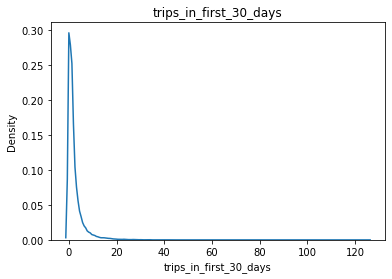

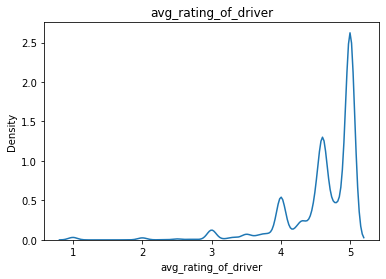

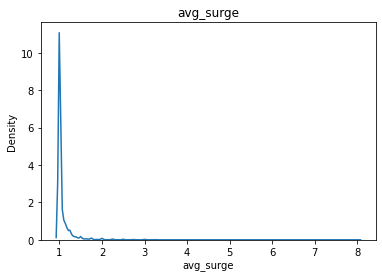

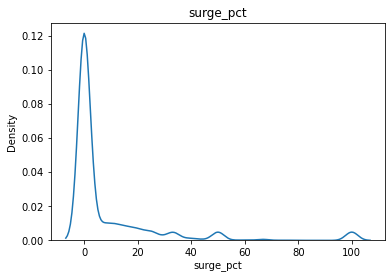

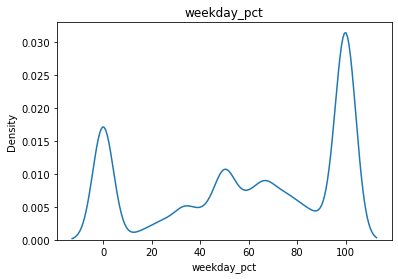

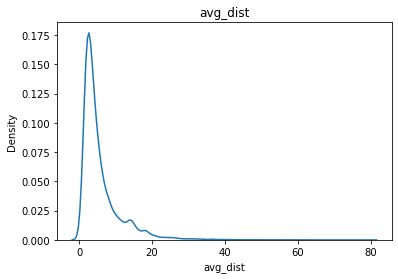

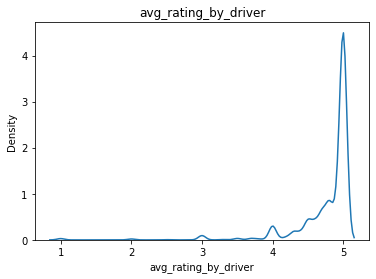

In [425]:
num_features = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge', 
               'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

for feature in num_features:
    sns.kdeplot(df[feature])
    plt.title(feature)
    plt.show();

### Exploring User Retention

In [426]:
#Printing earliest signup dates
print("Earliest 'signup_dates' in the data")
print(df.signup_date.sort_values().head())
print(' ')

#Printing the most recent 'last_trip_dates' in the data
print("Most recent 'last_trip_dates' in the data")
print(df.last_trip_date.sort_values(ascending = False).head())

Earliest 'signup_dates' in the data
39073    2014-01-01
32172    2014-01-01
20395    2014-01-01
32169    2014-01-01
10264    2014-01-01
Name: signup_date, dtype: object
 
Most recent 'last_trip_dates' in the data
13504    2014-07-01
6776     2014-07-01
41521    2014-07-01
41511    2014-07-01
25109    2014-07-01
Name: last_trip_date, dtype: object


**We can see that the data we are working with goes from January 1, 2014 to July 1, 2014.**

**Next, I will investigate user retention after 1 month and after 6 months.**

In [427]:
#Printing the ratio of users
print('There were', len(df[df['trips_in_first_30_days'] >= 1]), 'users that took a trip in the first month.')
print('The ratio of users who took at least 1 trip in the first month is:', 
      len(df[df['trips_in_first_30_days'] >= 1])/len(df))

There were 34187 users that took a trip in the first month.
The ratio of users who took at least 1 trip in the first month is: 0.6919604906286686


In [428]:
#Printing the ratio of users
print('There were', len(df[df['last_trip_date'] > '2014-06-01']), 
      'users active in the last month of the available data')

print('The ratio of users who were active after 6 months is:', 
      len(df[df['last_trip_date'] > '2014-06-01'])/len(df))

There were 18146 users active in the last month of the available data
The ratio of users who were active after 6 months is: 0.36728332591183255


**Roughly 69% of users were retained after the first month** 

**Roughly 37% of users were retained after 6-01-2014**

___

# Feature Engineering/Data Preperation

For this section I will begin doing some basic feature engineering and preparing the data for modeling.
- Create a new feature 'retained' that displays whether the user was retained after 6 months
- Remove datetime features
- Converting categorical features with getdummies function

### Adding 'retained' feature

In [430]:
#Adding new retained column
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

#Reordering the features
df = df[['retained', 'city','trips_in_first_30_days', 'signup_date', 'last_trip_date', 
              'avg_rating_of_driver', 'avg_rating_by_driver', 'weekday_pct', 'avg_dist', 
              'avg_surge', 'surge_pct', 'phone', 'ultimate_black_user']]

#Displaying the updated dataframe
df.head(10)

,retained,city,trips_in_first_30_days,signup_date,last_trip_date,avg_rating_of_driver,avg_rating_by_driver,weekday_pct,avg_dist,avg_surge,surge_pct,phone,ultimate_black_user
0,1,King's Landing,4,2014-01-25,2014-06-17,4.700000,5.0,46.2,3.67,1.10,15.4,iPhone,True
1,0,Astapor,0,2014-01-29,2014-05-05,5.000000,5.0,50.0,8.26,1.00,0.0,Android,False
2,0,Astapor,3,2014-01-06,2014-01-07,4.300000,5.0,100.0,0.77,1.00,0.0,iPhone,False
3,1,King's Landing,9,2014-01-10,2014-06-29,4.600000,4.9,80.0,2.36,1.14,20.0,iPhone,True
4,0,Winterfell,14,2014-01-27,2014-03-15,4.400000,4.9,82.4,3.13,1.19,11.8,Android,False
5,1,Winterfell,2,2014-01-09,2014-06-06,3.500000,5.0,100.0,10.56,1.00,0.0,iPhone,True
6,0,Astapor,1,2014-01-24,2014-01-25,4.601559,4.0,100.0,3.95,1.00,0.0,Android,False
7,0,Winterfell,2,2014-01-28,2014-01-29,5.000000,5.0,100.0,2.04,1.00,0.0,iPhone,False
8,0,Winterfell,2,2014-01-21,2014-02-01,4.500000,5.0,100.0,4.36,1.00,0.0,Android,False
9,0,Winterfell,1,2014-01-03,2014-01-05,4.601559,5.0,0.0,2.37,1.00,0.0,Android,False


### Removing datetime features

In [431]:
# Drop datetime features
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

#Preview updated dataframe
df.head()

,retained,city,trips_in_first_30_days,avg_rating_of_driver,avg_rating_by_driver,weekday_pct,avg_dist,avg_surge,surge_pct,phone,ultimate_black_user
0,1,King's Landing,4,4.7,5.0,46.2,3.67,1.10,15.4,iPhone,True
1,0,Astapor,0,5.0,5.0,50.0,8.26,1.00,0.0,Android,False
2,0,Astapor,3,4.3,5.0,100.0,0.77,1.00,0.0,iPhone,False
3,1,King's Landing,9,4.6,4.9,80.0,2.36,1.14,20.0,iPhone,True
4,0,Winterfell,14,4.4,4.9,82.4,3.13,1.19,11.8,Android,False


### Converting Categorical Features

In [438]:
#Converting categorical features to numerical
final_df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

#Previewing updated dataframe
final_df.head()

,retained,trips_in_first_30_days,avg_rating_of_driver,avg_rating_by_driver,weekday_pct,avg_dist,avg_surge,surge_pct,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,1,4,4.7,5.0,46.2,3.67,1.10,15.4,1,0,1,1
1,0,0,5.0,5.0,50.0,8.26,1.00,0.0,0,0,0,0
2,0,3,4.3,5.0,100.0,0.77,1.00,0.0,0,0,1,0
3,1,9,4.6,4.9,80.0,2.36,1.14,20.0,1,0,1,1
4,0,14,4.4,4.9,82.4,3.13,1.19,11.8,0,1,0,0


___

# Modeling

In [465]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, auc, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE

### Train Test Split

In [456]:
#Train test split
X = final_df.drop(['retained'], axis = 1).copy()
y = final_df['retained'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Generic Random Forest Model

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      6289
           1       0.68      0.66      0.67      3593

    accuracy                           0.76      9882
   macro avg       0.74      0.74      0.74      9882
weighted avg       0.76      0.76      0.76      9882

Confusion Matrix:


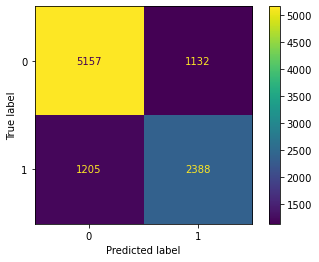

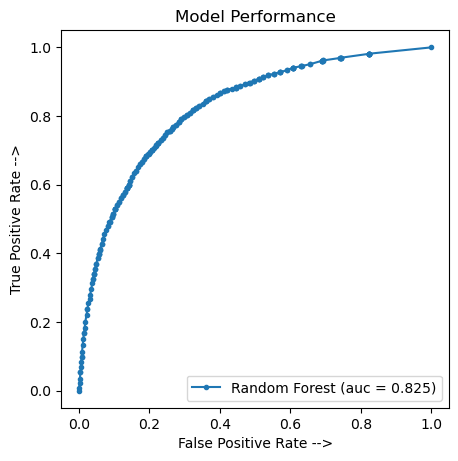

In [457]:
#Instantiating model
rfc = RandomForestClassifier()

#Training model
rfc.fit(X_train, y_train)

#Making prediction
y_pred = rfc.predict(X_test)

# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

#Classification Report
print('Classification Report:\n',
    classification_report(y_test, y_pred))

#Printing the confusion matrix for model testing
print('Confusion Matrix:\n ',
    plot_confusion_matrix(rfc, X_test, y_test))

#Creating ROC Curve for model on testing dataset
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_rf = auc(rf_fpr, rf_tpr)

#Plotting ROC Curve and AUC score
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (auc = %0.3f)' % auc_rf)

plt.title('Model Performance')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

### Randomized Grid Search Hyperparameter Tuning

In [458]:
#Hyperparameters to manipulate

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

#Number of features to be considered at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 110, num = 10)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

#Method of selecting samples for training each tree
bootstrap = [True, False]

#Creating the param grid
rfc_param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

/Users/tylermeester/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters:  {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      6289
           1       0.74      0.66      0.69      3593

    accuracy                           0.79      9882
   macro avg       0.78      0.76      0.77      9882
weighted avg       0.79      0.79      0.79      9882

Confusion Matrix:


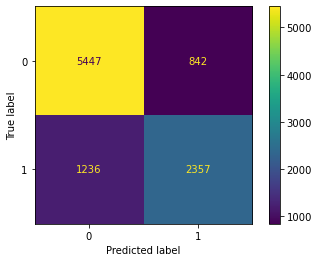

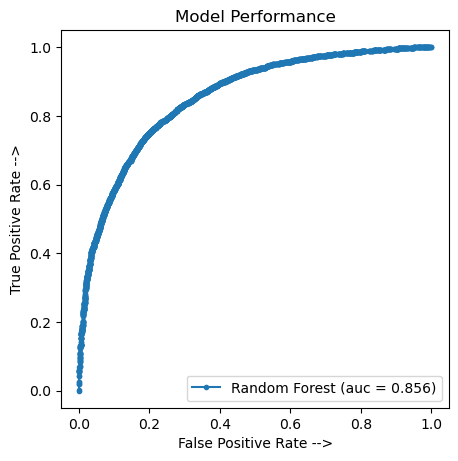

In [459]:
#Instantiateing the RandomForestClassifier
rfc = RandomForestClassifier()

#Instantiating the RandomGrid
rfc_grid = RandomizedSearchCV(estimator = rfc, param_distributions = rfc_param_grid, scoring = 'f1', cv = 5, n_jobs = -1)

#Training model
rfc_grid.fit(X_train, y_train)

#Making prediction
y_pred = rfc_grid.predict(X_test)

# Compute predicted probabilities
y_pred_prob = rfc_grid.predict_proba(X_test)[:,1]

#Printing the best params
rfc_best_params = rfc_grid.best_params_
print('Best Parameters: ', rfc_grid.best_params_)

#Classification Report
print('Classification Report:\n',
    classification_report(y_test, y_pred))

#Printing the confusion matrix for model testing
print('Confusion Matrix:\n ',
    plot_confusion_matrix(rfc_grid, X_test, y_test))

#Creating ROC Curve for model on testing dataset
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_rf = auc(rf_fpr, rf_tpr)

#Plotting ROC Curve and AUC score
plt.figure(figsize = (5,5), dpi = 100)
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (auc = %0.3f)' % auc_rf)

plt.title('Model Performance')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


**Model performance increased slightly with parameter tuning.**

_AUC Score in generic model: **0.825**_

_AUC Score for parameter tuned model: **0.856**_


**Parameters to be Used in Final Model:**

_'n_estimators': 1000, 
'min_samples_split': 10, 
'min_samples_leaf': 1, 
'max_features': 'sqrt', 
'max_depth': 10, 
'bootstrap': False_


### Feature Importance

I will be using Recursive Feature Elimination (RFE) to determine the most important features in the dataset for predicting user retention. Within the RFE model I will be using a Random Forest Classifier with the predetermined optimal parameters. 

In [491]:
#Instantiating the RFE model
rfe = RFE(estimator = RandomForestClassifier(n_estimators = 1000, 
                                             min_samples_split = 10, 
                                             min_samples_leaf = 1, 
                                             max_features = 'sqrt',
                                             bootstrap = False), n_features_to_select = 10)

#Fitting the RFE model to the training data
rfe.fit(X_train, y_train)


new_columns = X.loc[:, rfe.support_].columns


Index(['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_rating_by_driver', 'weekday_pct', 'avg_dist', 'avg_surge',
       'surge_pct', 'city_King's Landing', 'phone_iPhone',
       'ultimate_black_user_True'],
      dtype='object')

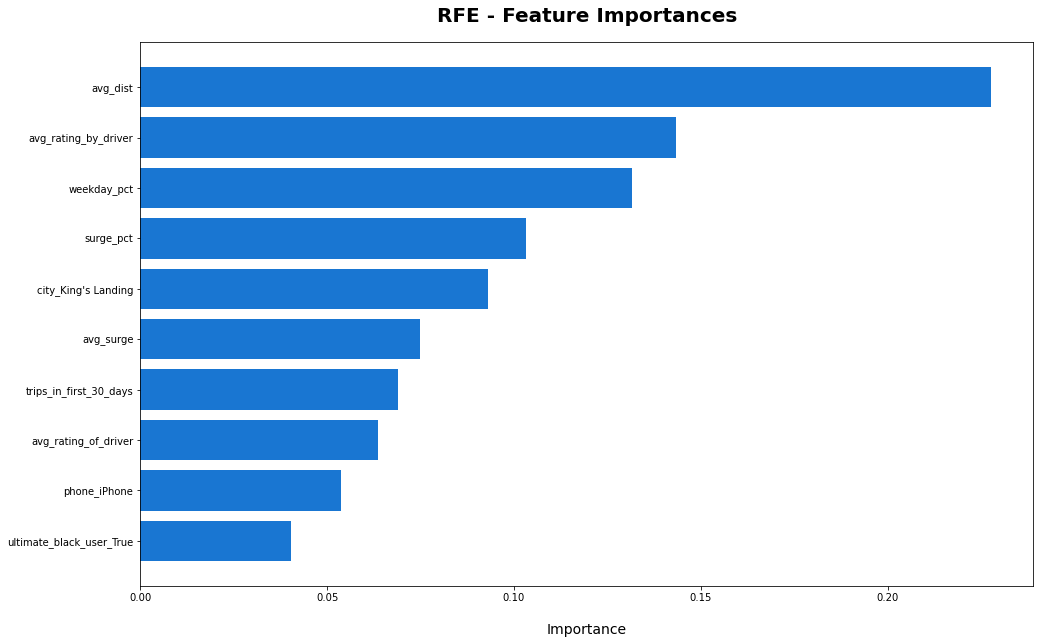

In [492]:
dset = pd.DataFrame()
dset['attr'] = new_columns
dset['importance'] = rfe.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending = True)

plt.figure(figsize = (16,10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFE - Feature Importances', fontsize = 20, fontweight='bold', pad =20)
plt.xlabel('Importance', fontsize = 14, labelpad = 20)
plt.show()

___

## Conculsion and Final Thoughts

After hyperparameter tuning I was able to create a model that could predict whether a user would be active after 6 months with **77% accuracy**. One caveat for this, though, is that there was not enough data to show user retention for a true 6 months (~180 days). Because of this, users were considered to be retained if they had used Ultimate any time after 6-1-2014. This date corresponds to 6 months after the first signup dates can be seen in the data on 1-1-2014.

**The 5 most important features for the model were:**
- Average distance per trip 
- The average rating of the user by the driver
- The percentage of a user's rides taken during the week
- The percentage of trips taken when surge multiplier was greater than 1
- Being located in King's Landing

**Ultimate can potentially leverage this information by:**

1. Incentivizing longer trips by users
2. Encouraging good rider behavior with promotions or perks
3. Incentivizing the use of Ultimate during the week
4. Advertising to people who regularly use Ultimate during peak hours
5. Promoting the use of Ultimate in King's Landing